In [3]:
import numpy as np 
import pandas as pd

In [4]:
Housing_price=pd.read_csv('Beijing_housing_price.csv') #, sep=',', encoding='iso-8859-1', low_memory=False
Housing_price.head()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,8/9/16,1464,106,415.0,31680,131.00,2,1,...,1,2005,3,6,0.217,1,0,1,7,56021
1,116.453917,39.881534,7/28/16,903,126,575.0,43436,132.38,2,2,...,1,2004,4,6,0.667,1,1,0,7,71539
2,116.561978,39.877145,12/11/16,1271,48,1030.0,52021,198.00,3,2,...,4,2005,3,6,0.500,1,0,0,7,48160
3,116.438010,40.076114,9/30/16,965,138,297.5,22202,134.00,3,1,...,1,2008,1,6,0.273,1,0,0,6,51238
4,116.428392,39.886229,8/28/16,927,286,392.0,48396,81.00,2,1,...,4,1960,2,2,0.333,0,1,1,1,62588


In [5]:
cols = [i for i in Housing_price.columns if i not in ['tradeTime']]
for col in cols:
    Housing_price[col] = pd.to_numeric(Housing_price[col], errors = 'coerce')
Housing_price['tradeTime'] = pd.to_datetime(Housing_price['tradeTime'], format = '%m/%d/%y')

Housing_price=Housing_price.drop(['constructionTime'], axis=1)

In [6]:
Housing_price.head()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,1464,106,415.0,31680,131.00,2,1,...,1,1,3,6,0.217,1,0,1,7,56021
1,116.453917,39.881534,2016-07-28,903,126,575.0,43436,132.38,2,2,...,2,1,4,6,0.667,1,1,0,7,71539
2,116.561978,39.877145,2016-12-11,1271,48,1030.0,52021,198.00,3,2,...,3,4,3,6,0.500,1,0,0,7,48160
3,116.438010,40.076114,2016-09-30,965,138,297.5,22202,134.00,3,1,...,1,1,1,6,0.273,1,0,0,6,51238
4,116.428392,39.886229,2016-08-28,927,286,392.0,48396,81.00,2,1,...,1,4,2,2,0.333,0,1,1,1,62588


### Feature Distribution in histogram

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

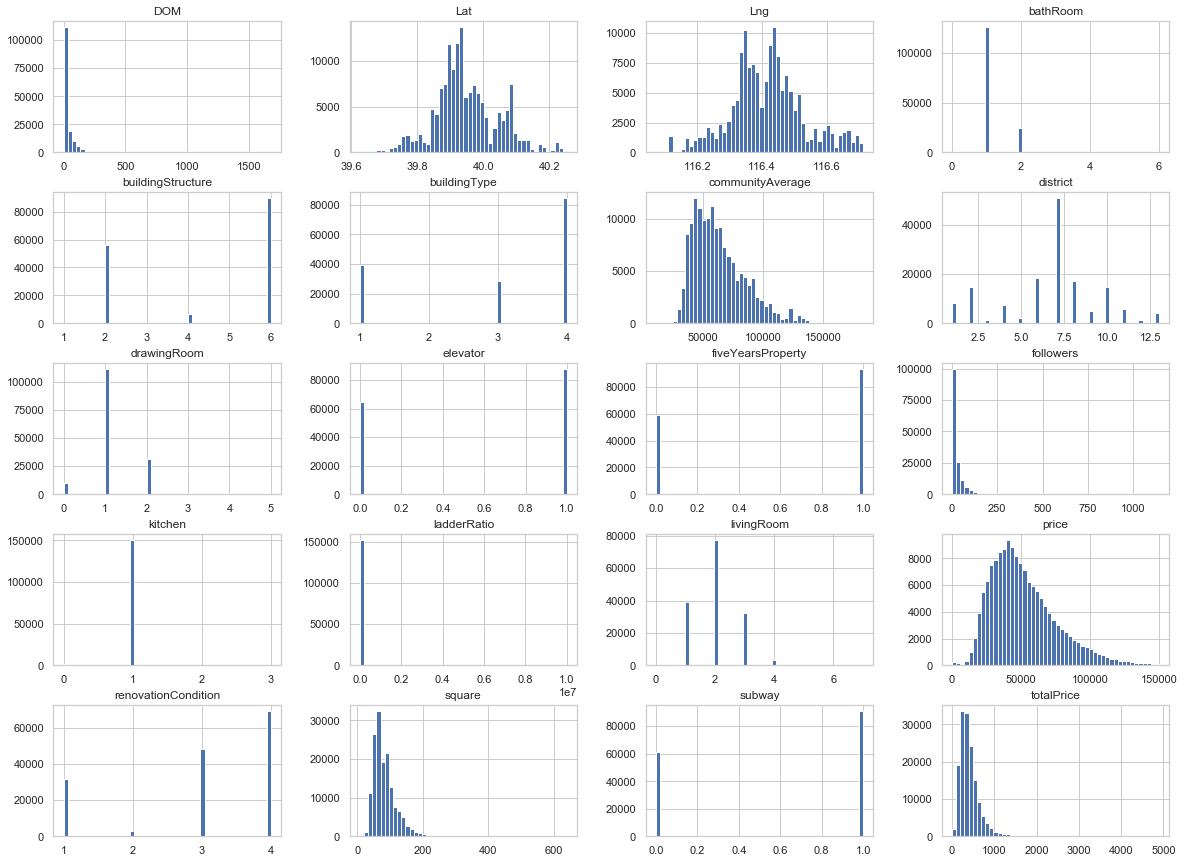

In [8]:
sns.set(style='whitegrid')
Housing_price.hist(bins=50, figsize=(20,15))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

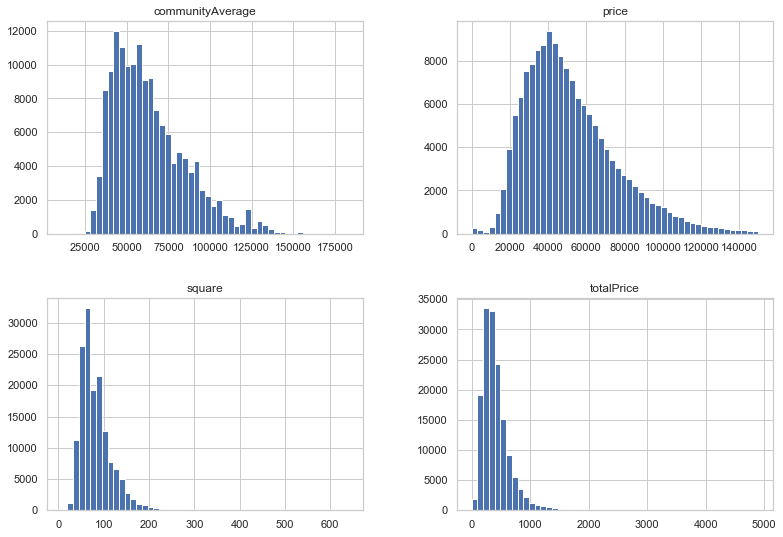

In [9]:
# Histogram for main features
Housing_price.hist(['square','totalPrice','price','communityAverage'],bins=50,figsize=(13,9))
plt.show
# Average price-￥； Total price-￥10,000

In [ ]:
Housing_price.hist(['square','totalPrice','price','communityAverage'],bins=50,figsize=(13,9))
plt.show

### Feature correlations in heatmap

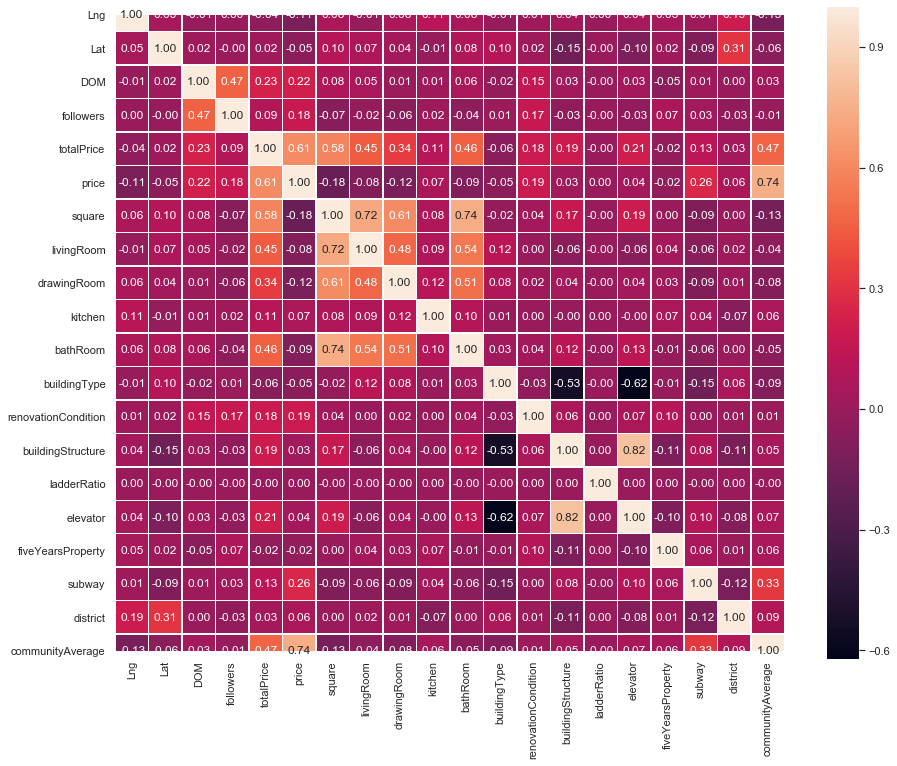

In [10]:
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(Housing_price.corr(), square=True, annot = True, linewidth = .5, fmt = ".2f")
plt.show()

### Pairplots for house with different number of bathroom

In [11]:
Housing=Housing_price.drop(['ladderRatio','subway','DOM','followers','fiveYearsProperty','kitchen','tradeTime','Lat','Lng','district','communityAverage','elevator','buildingStructure','renovationCondition','buildingType','drawingRoom'],axis=1)
Housing.head()

,totalPrice,price,square,livingRoom,bathRoom
0,415.0,31680,131.00,2,1
1,575.0,43436,132.38,2,2
2,1030.0,52021,198.00,3,3
3,297.5,22202,134.00,3,1
4,392.0,48396,81.00,2,1


In [12]:
import warnings
warnings.filterwarnings("ignore")

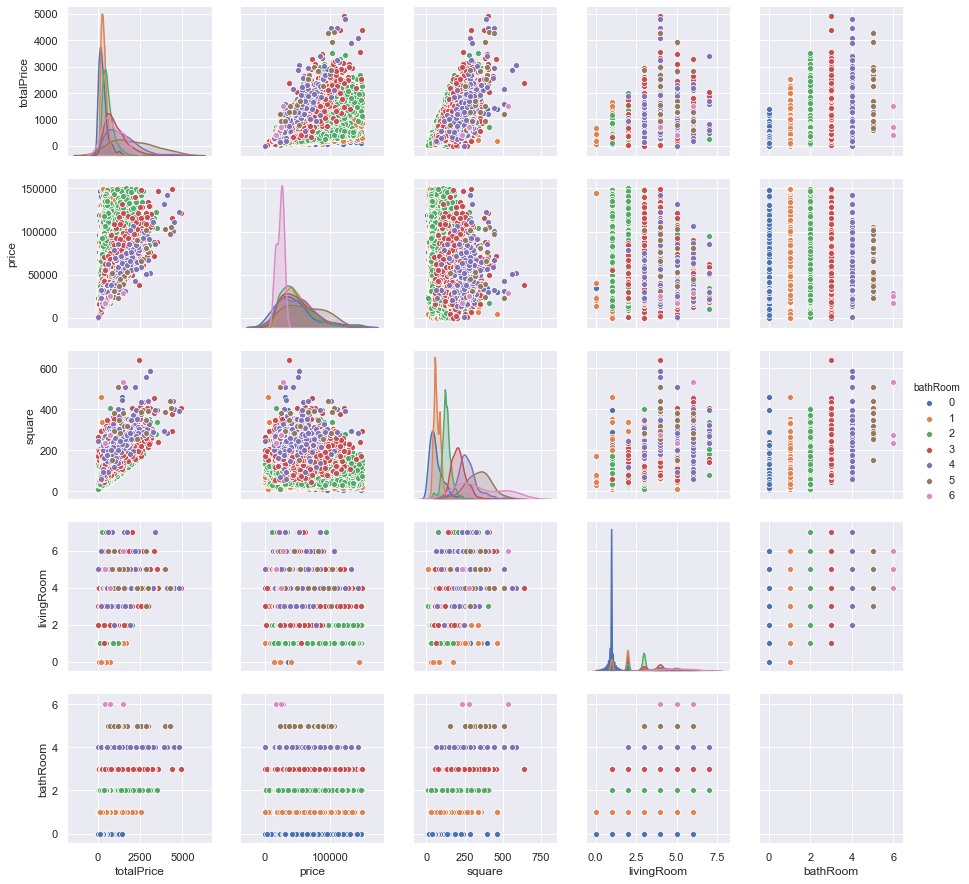

In [32]:
sns.set()                       
sns.pairplot(Housing,hue="bathRoom")   
plt.show()  

### Geometric distribution

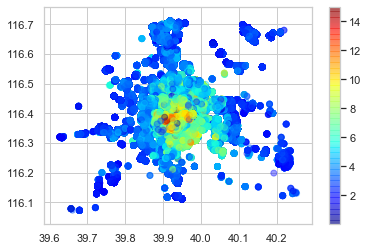

In [12]:
#drawed by average housing price at points with different longitude and latitude

fig = plt.scatter(x=Housing_price['Lat'], y=Housing_price['Lng'], alpha=0.4, \
      c=Housing_price['price']/10000, cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.show()

# Price showed in ￥10,000

 ### Distribution in administrative district; K-means clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
#Housing_price_sample=Housing_price.sample(n=500,random_state=123,axis=0)

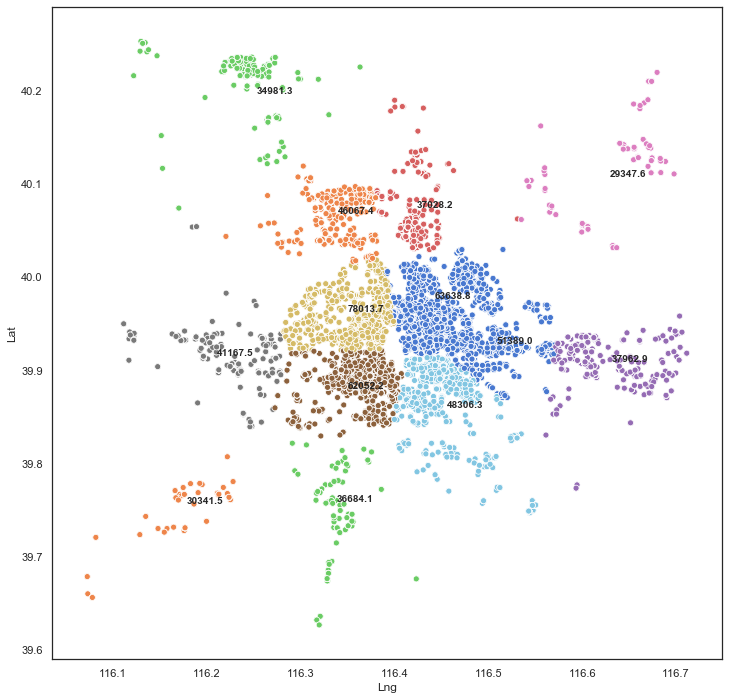

In [15]:
# set clustering number as administravtive number of Beijing
N_clusters = 13
KMC_beijing = KMeans(n_clusters = N_clusters)
KMC_beijing.fit(Housing_price[['Lng','Lat']])
KMC_beijing_pred = KMC_beijing.predict(Housing_price[['Lng','Lat']])
Housing_price['cluster'] = KMC_beijing_pred  

plt.figure(figsize=(12, 12))


ax = sns.scatterplot(x='Lng', y='Lat', hue='cluster', 
                     palette=sns.color_palette("muted", n_colors=N_clusters), 
                     legend = False,
                     data=Housing_price)

for i in Housing_price['cluster'].unique():
    df_average = Housing_price[Housing_price['cluster'] == i].mean()
    ax.text(df_average['Lng'], df_average['Lat'], str(df_average['price'].round(1)), 
            horizontalalignment='left', size='medium', weight='semibold')

### Linear Regression for Price on Features

In [13]:
from sklearn.preprocessing import scale

In [14]:
# reason of dropping: totalPrice: corr too high to linear relation; corr > 0.1
X=Housing_price.drop(['totalPrice','price', 'kitchen','tradeTime'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scale(np.array(X)), scale(np.array(Housing_price['price'])), test_size=0.3, random_state=27)

In [15]:
X.head()

,Lng,Lat,DOM,followers,square,livingRoom,drawingRoom,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,1464,106,131.00,2,1,1,1,3,6,0.217,1,0,1,7,56021
1,116.453917,39.881534,903,126,132.38,2,2,2,1,4,6,0.667,1,1,0,7,71539
2,116.561978,39.877145,1271,48,198.00,3,2,3,4,3,6,0.500,1,0,0,7,48160
3,116.438010,40.076114,965,138,134.00,3,1,1,1,1,6,0.273,1,0,0,6,51238
4,116.428392,39.886229,927,286,81.00,2,1,1,4,2,2,0.333,0,1,1,1,62588


In [16]:
print(y_train[0:50])

[ 2.80764262e-01 -1.02090698e-01  9.39741619e-01 -1.75590905e-01
 -2.08947417e-01  4.58886383e-01  4.06884187e-02 -4.44222571e-01
  3.83606611e-01  8.50473631e-01  8.25021702e-01  4.44070463e-01
  4.20127467e-02 -7.89977282e-02  9.16814189e-01  2.54172609e-02
  1.49529723e+00  2.16296549e+00  4.31406576e-01  6.54100614e-01
  1.40325643e+00 -5.55755823e-01  1.15908345e+00  1.04918329e-01
 -1.00805524e+00 -6.14109028e-01 -8.09074947e-01  2.32283672e+00
 -5.59894349e-01  2.19141622e-01  1.84897559e+00 -8.14372259e-01
 -6.77842315e-01 -1.10696599e+00 -3.56154756e-01 -1.22259638e+00
 -5.65522743e-01 -7.33133011e-01 -8.16151825e-01 -4.00561131e-01
  8.30608711e-01  1.11807345e-02 -8.62373661e-04  3.26536350e-01
 -3.68570332e-01 -2.47684013e-01  9.73448277e-02  8.62061502e-01
 -5.80297278e-01  5.57010814e-01]


In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)
reg_pred_train = reg.predict(X_train)
reg_pred_test = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
print("train error: " + str(mean_squared_error(y_train, reg_pred_train)))
print("test error:  " + str(mean_squared_error(y_test, reg_pred_test)))

[-0.00645614  0.00864585  0.12913798  0.10045943 -0.13167566  0.02363206
 -0.00520953  0.02899903  0.01364418  0.15538813 -0.01048236  0.00229126
  0.01322332 -0.07871159  0.0111925  -0.0078193   0.7250996 ]
0.00019326862686334213
train error: 0.3614382348065837
test error:  0.3655102625765632


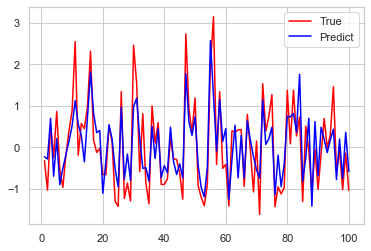

In [18]:
x = [i+1 for i in range(100)]
plt.plot(x, y_test[0:100], c='red', label='True')
plt.plot(x, reg_pred_test[0:100], c='blue', label='Predict')
plt.legend()
plt.show()

### Housing price time trend

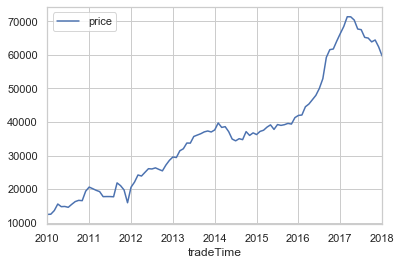

In [19]:
avg_price_by_trade_time= pd.DataFrame()
avg_price_by_trade_time['price'] = Housing_price['price']
avg_price_by_trade_time.index = Housing_price['tradeTime'].astype('datetime64[ns]')
avg_price_by_trade_month = avg_price_by_trade_time.resample('M').mean().to_period('M').fillna(0)
avg_price_by_trade_month.plot(kind='line')
plt.show()

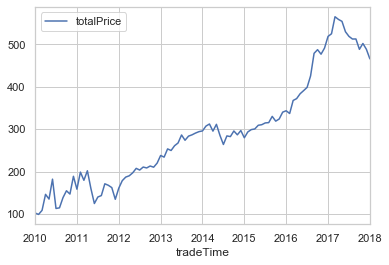

In [20]:
price_by_trade_time = pd.DataFrame()
price_by_trade_time['totalPrice'] = Housing_price['totalPrice']
price_by_trade_time.index = Housing_price['tradeTime'].astype('datetime64[ns]')
price_by_trade_month = price_by_trade_time.resample('M').mean().to_period('M').fillna(0)
price_by_trade_month.plot(kind='line')
plt.show()

#### Weekly Total price

In [21]:
# Using weekly average to reduce effect from uneven distribution in time

wk_price_by_trade_time = price_by_trade_time.resample('W').mean()
wk_price_by_trade_time.dropna()
wk_price_by_trade_time.head()

,totalPrice
tradeTime,
2010-01-03,165.000
2010-01-10,72.500
2010-01-17,99.000
2010-01-24,123.625
2010-01-31,73.875


In [22]:
wk_price_by_trade_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 422 entries, 2010-01-03 to 2018-01-28
Freq: W-SUN
Data columns (total 1 columns):
totalPrice    404 non-null float64
dtypes: float64(1)
memory usage: 6.6 KB


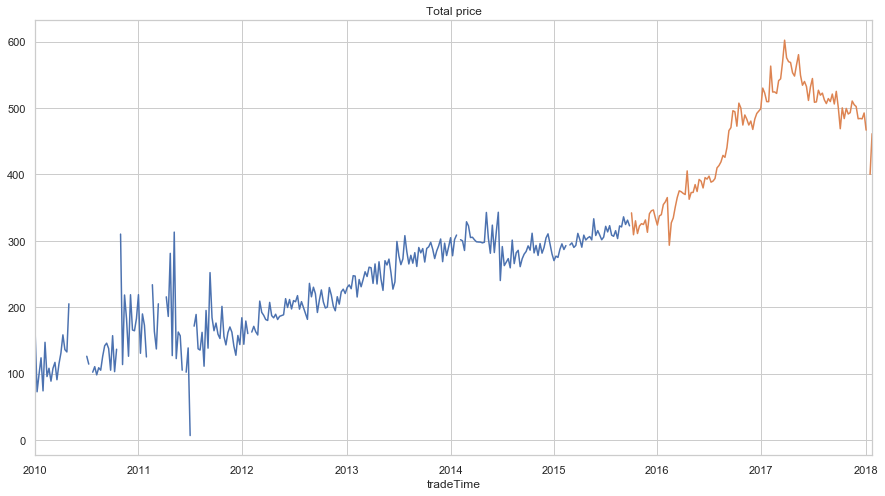

In [23]:
# Creating train and test set

train = wk_price_by_trade_time[0:300]
test = wk_price_by_trade_time[300:]

#Plotting data

train.totalPrice.plot(figsize=(15,8), title= 'Total price')
test.totalPrice.plot(figsize=(15,8), title= 'Total price')
plt.show()

#### MA model w/ window width=3

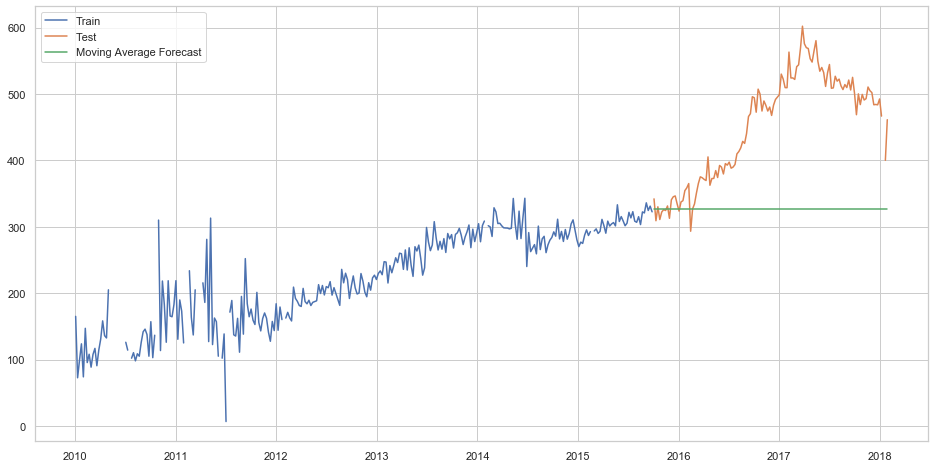

In [24]:
# MA model w/ window width=3
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['totalPrice'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['totalPrice'], label='Train')
plt.plot(test['totalPrice'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

#### Data stationarity

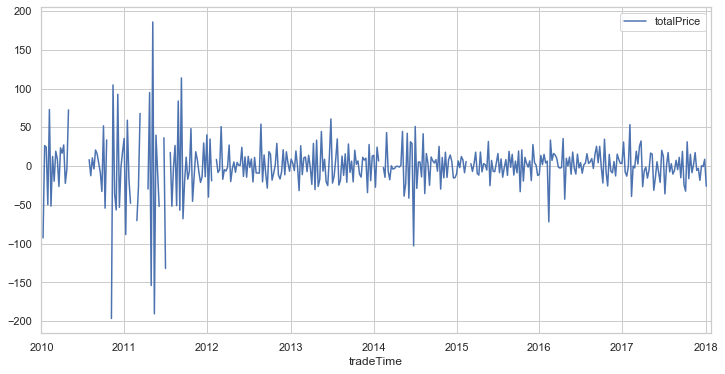

In [28]:
# Detrend data by first differencing data
# Set differencing time as 1

diff1=wk_price_by_trade_time.diff(1)
diff1.plot(figsize=(12,6))

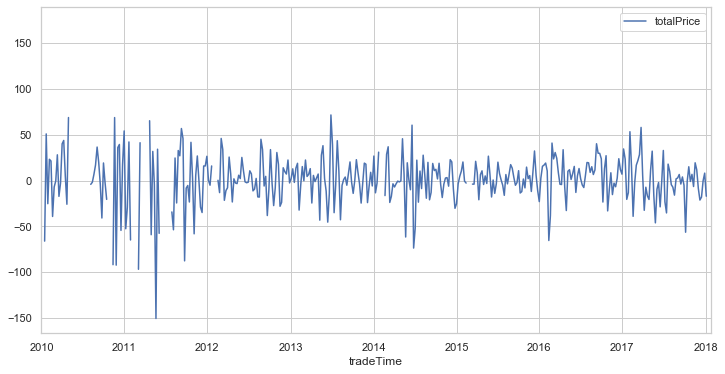

In [29]:
# Set differencing time as 2

diff2=wk_price_by_trade_time.diff(2)
diff2.plot(figsize=(12,6))

#### ACF and PACF

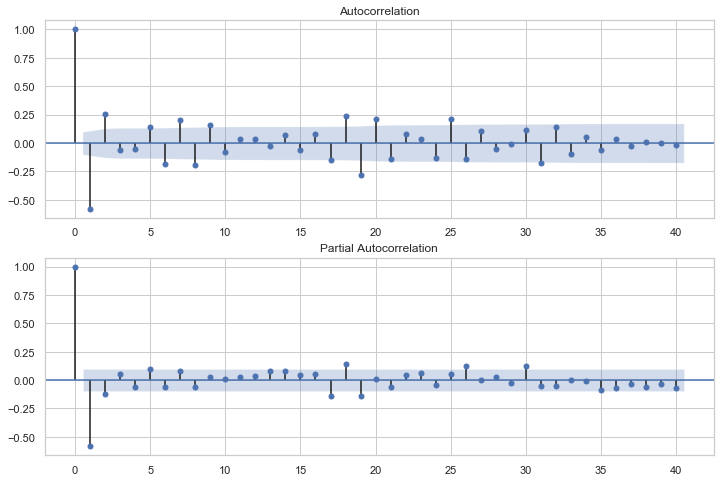

In [31]:
# acf and pacf

import statsmodels.api as sm

diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

ACF: 6 order out of boarder, p=7; PACF: q=2

#### ARIMA model

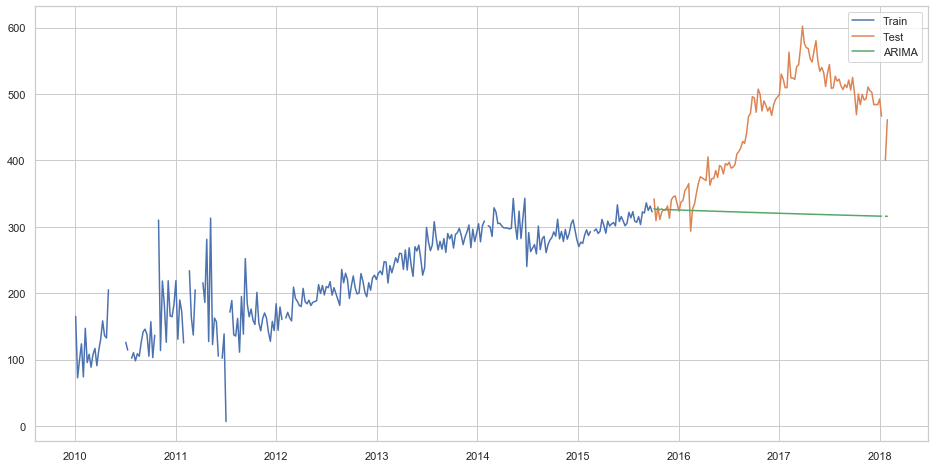

In [42]:
wk_price_by_trade_time.dropna(inplace=True)

arima_total = test.copy()
arima71_fit = sm.tsa.ARMA(wk_price_by_trade_time,(7,1)).fit()
arima_total['ARIMA'] = arima212_fit.predict(start="2015-10-04", end="2018-01-28", dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(train['totalPrice'], label='Train')
plt.plot(test['totalPrice'], label='Test')
plt.plot(arima_total['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

#### Seasonal ARIMA

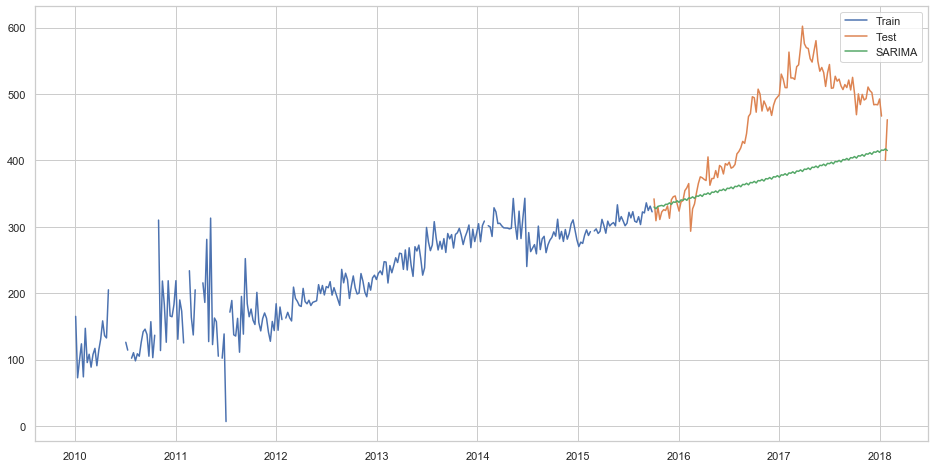

In [43]:
import statsmodels.api as sm
sarima_y_hat_avg = test.copy()
sarima_fit = sm.tsa.statespace.SARIMAX(train.totalPrice, order=(7, 1, 1), seasonal_order=(0, 1, 1, 4)).fit()
sarima_y_hat_avg['SARIMA'] = sarima_fit.predict(start="2015-10-04", end="2018-01-28", dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(train['totalPrice'], label='Train')
plt.plot(test['totalPrice'], label='Test')
plt.plot(sarima_y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

#### Prophet Time Series Forecasting

In [46]:
from fbprophet import Prophet

In [54]:
forecast = wk_price_by_trade_time
forecast = forecast.rename(columns={ 'totalPrice': "y" })
forecast.reset_index(level=0, inplace=True)
forecast = forecast.rename(columns={ 'tradeTime': "ds" })

In [55]:
from scipy.stats import boxcox
forecast['y'], lam = boxcox(forecast['y'])

model = Prophet()
model.fit(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future = model.make_future_dataframe(periods=12, freq = 'w')
future.tail()

,ds
411,2018-03-25
412,2018-04-01
413,2018-04-08
414,2018-04-15
415,2018-04-22


In [57]:
#predicting the future model
forecast = model.predict(future)
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

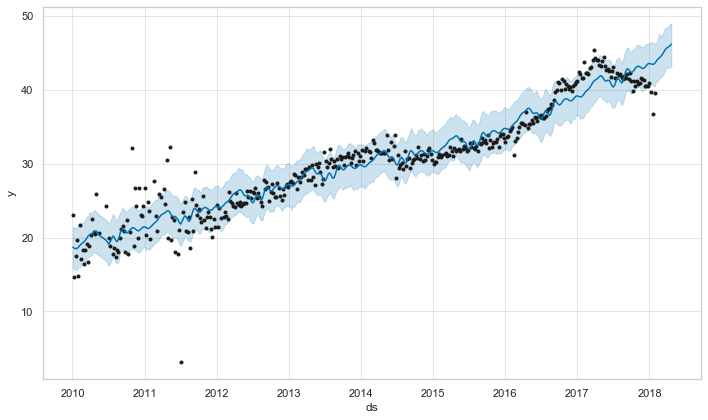

In [63]:
model.plot(forecast_data);